# OVERVEIW 

We should have a balence between over and under fitiing , to have an optimal balence between them we use regularisation(applies strict penaltity) They are types of linear reg just a stricter version , adding lamda and aphal to linear reg will help reduce overfititign as they act like penalty 
Adding them forces the equation(x1c1+x2c2+x3c3=y) coeffs(c1,c2,c3 ) to 0(forced)

**Ridge** tries to make the coeff zero but **never makes it entirely zero** 
whereas **lasso** it makes it **exact zero** i.e the variable itself is dropped 

# Ridge Regression 
adding a penalty term proportional to the square of the coefficients.Does not perform feature selection. All predictors are retained, although their coefficients are reduced in size to minimize overfitting.suited for situations where all predictors are potentially relevant, and the goal is to reduce overfitting rather than eliminate features.Produces a model that includes all features, but their coefficients are smaller .Reduces the magnitude of coefficients, shrinking them towards zero,Generally faster as it doesn’t involve feature selection.Predicting house prices where all features like size, location, etc

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV   
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


### GridsearchCv 
maximzies , works on the context of maxzimazation finds the best value ,thus will end up giving Maximum MSE instead of minimum as we will be applying on it first ,Solution to it : if we want to apply on MSE onli thus we'll work on NEG MSE

In [5]:
df=pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\Assignment 2 Advertising.csv")

In [6]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
df = df.iloc[: , 1:]#drops a specific column 

In [8]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Ridge Hyperparameters

Alpha controls the strength of regularisation 

Higher alpha - more regularisation (shrinks coeff closer to 0 )

Lower alpha - less regularisation (becomes same as linear regression)

When u dont know what should be the ocreect degree of penalty(alphha) then we do cross validation 
eg: u have 20 data points in training , we will divide these in batchs example 5 each thus 4 batches 
remaining 15 u take a value of alpha and train it keeping the 5 separate for testing 
nextt round u take other batch and repeat the same , same for all 4 on same aplha value 
after the 4 repeat the process with a stricter aplha value on all 4 batches train test
When u get the least mean sq error that is the best accuracy u keep it separate and continue to the next batch 
this u do for each batch 
u keep reerating and keep noting the mse value for example 10 aplha values (1 being least )
**The MSE value which is a least for a batch will will OUR FINAL APLHA VALUE** 
Now this is used for final testing 

In [12]:
#anything in log value becomes in an exponential curve 
alpha_values = np.logspace(-3,3,10)
#10 aplha values from 10^(-3) to 10^3 #random generation of values with equal space 

In [13]:
print(alpha_values)#end goal of cross validation to find the least mse score giving alpha vlaue 

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


In [14]:
# Define Ridge regression model
ridge = Ridge()

# Define hyperparameter grid for alpha values (regularization strength)
alpha_values = {'alpha': np.logspace(-3, 3, 10)}

# Perform grid search with cross-validation
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')

# Train Ridge model with cross-validation
ridge_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [15]:
#best Ridge model
best_ridge = ridge_cv.best_estimator_
y_pred_ridge=best_ridge.predict(X_test)
#best_ridge.predict(X_test) uses the best-trained Ridge model to predict target values (y_pred_ridge) for the test dataset (X_test).

In [16]:
from sklearn.metrics import mean_squared_error

# Compute RMSE for Ridge Regression
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Best alpha value
print(f"Best ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
#did root the find rsme to check if it tends to zero

Best ridge alpha: 0.001
Ridge Regression RMSE: 1.78


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Compute Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)

# Compute R² Score
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Best ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Ridge Regression RMSE: {rmse_ridge:.4f}")
print(f"Ridge Regression R² Score: {r2_ridge:.4f}")


Best ridge alpha: 0.001
Ridge Regression MSE: 3.1741
Ridge Regression RMSE: 1.7816
Ridge Regression R² Score: 0.8994


# Lasso Regression
adding a penalty term proportional to the absolute value of the coefficients.Performs automatic feature selection. Less important predictors are completely excluded by setting their coefficients to zero.Ideal when you suspect that only a subset of predictors is important, and the model should focus on those while ignoring the irrelevant ones.Produces a model that is simpler, retaining only the most significant features and ignoring the rest by setting their coefficients to zero.Shrinks some coefficients to exactly zero, effectively removing their influence from the model. This leads to a simpler model with fewer features.May be slower due to the feature selection process
**e.g., genetic studies where only a few genes out of thousands are relevant**

In [19]:
# Define lassa regression model
lasso = Lasso()

# Define hyperparameter grid for alpha values (regularization strength)
alpha_values = {'alpha': np.logspace(-3, 3, 10)}#not always nessessary to give aplha u can also fit the data

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')

# Train Ridge model with cross-validation
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [20]:
#best Ridge model
best_lasso = lasso_cv.best_estimator_
y_pred_lasso=best_lasso.predict(X_test)
#best_ridge.predict(X_test) uses the best-trained Ridge model to predict target values (y_pred_ridge) for the test dataset (X_test).

In [21]:
from sklearn.metrics import mean_squared_error

# Compute RMSE for Ridge Regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Best alpha value
print(f"Best lasso alpha: {lasso_cv.best_params_['alpha']}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")
#did root the find rsme to check if it tends to zero

Best lasso alpha: 2.154434690031882
Lasso Regression RMSE: 1.77


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Compute Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)

# Compute R² Score
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Best lasso alpha: {lasso_cv.best_params_['alpha']}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.4f}")
print(f"Lasso Regression R² Score: {r2_lasso:.4f}")

Best lasso alpha: 2.154434690031882
Lasso Regression MSE: 3.1248
Lasso Regression RMSE: 1.7677
Lasso Regression R² Score: 0.9010


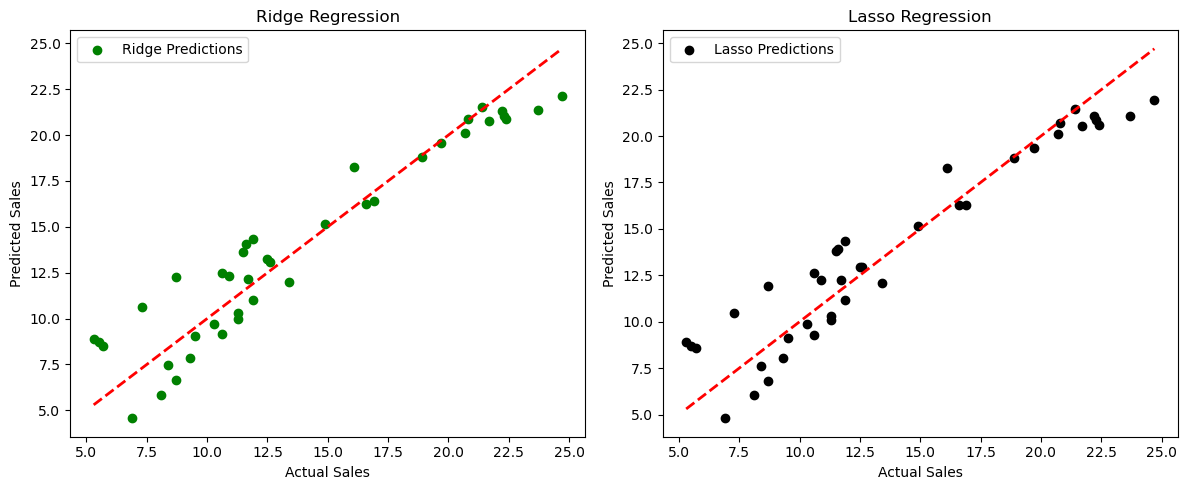

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Ridge Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()

# Lasso Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='black', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
print("\n📌 Ridge Regression Coefficients:")
for feature_name, coeff in zip(X.columns, best_ridge.coef_):
    print(f"{feature_name}: Coefficient = {coeff:.4f}")



📌 Ridge Regression Coefficients:
TV: Coefficient = 0.0447
Radio: Coefficient = 0.1892
Newspaper: Coefficient = 0.0028


In [25]:
print("\n📌 Lasso Regression Coefficients:")
for feature_name, coeff in zip(X.columns, best_lasso.coef_):
    print(f"{feature_name}: Coefficient = {coeff:.4f}")


📌 Lasso Regression Coefficients:
TV: Coefficient = 0.0445
Radio: Coefficient = 0.1808
Newspaper: Coefficient = 0.0000


In [26]:
from sklearn.linear_model import ElasticNet
# Lasso Regression with Hyperparameter Tuning
elasticnet = ElasticNet()

elasticnet_cv = GridSearchCV(elasticnet, alpha_values, cv=5,
                        scoring='neg_mean_squared_error')   #GridSearchCV always works on Training set and not on Testing data

elasticnet_cv.fit(X_train, y_train) #train ElasticNet model with cross validation

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [27]:
# Define hyperparameter grid
param_grid = {
    'alpha': np.logspace(-3, 3, 10),   # Regularization strength
    'l1_ratio': np.linspace(0, 1, 10)  # Mix between Lasso (1.0) and Ridge (0.0)
}


In [28]:
best_elasticnet = elasticnet_cv.best_estimator_
y_pred_elasticnet = best_elasticnet.predict(X_test)


In [29]:
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Best ElasticNet Alpha: {elasticnet_cv.best_params_['alpha']}")
print(f"ElasticNet Regression RMSE: {rmse_elasticnet:.2f}")
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred_elasticnet)))

Best ElasticNet Alpha: 2.154434690031882
ElasticNet Regression RMSE: 1.77
R2 score value: 0.9004


In [30]:
#Print coefficients of ElectricNet with feature names
for feature_name, coef in zip(X.columns, best_elasticnet.coef_):
    print(f"Feature: {feature_name}, Coefficient: {coef}")

Feature: TV, Coefficient: 0.04462498730829689
Feature: Radio, Coefficient: 0.18398459181164062
Feature: Newspaper, Coefficient: 0.0016161835065644813


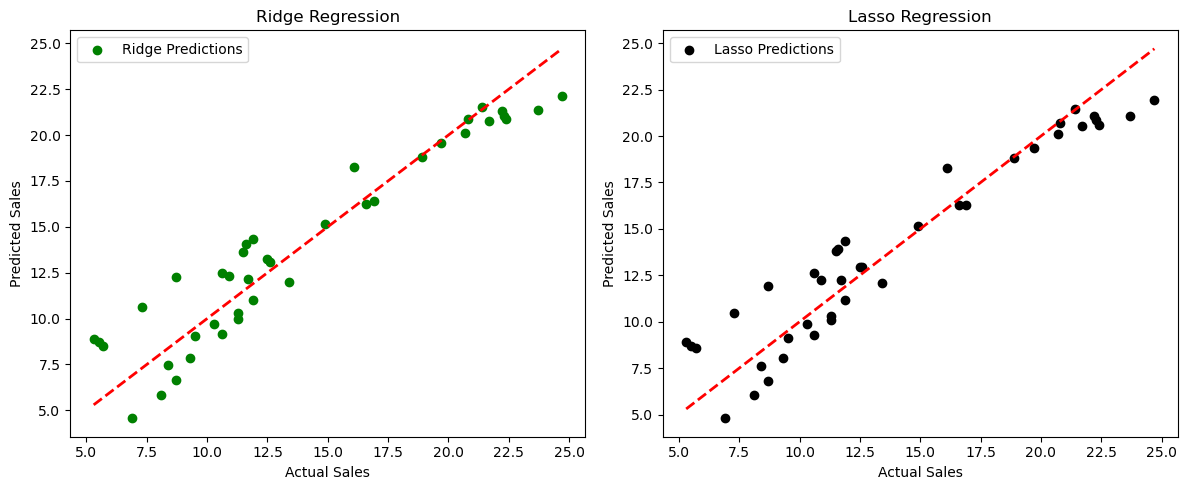

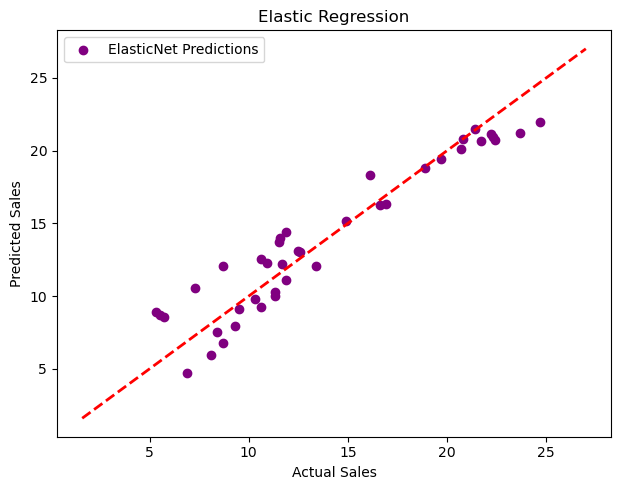

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Ridge Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()

# Lasso Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='black', label='Lasso Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.tight_layout()
plt.show()

#ElasticNet Regression Plot 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elasticnet, color='purple', label='ElasticNet Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Elastic Regression")
plt.legend()

plt.tight_layout()
plt.show()

## Practice Dataset

In [33]:
#Import and display first 5 rows of dataset
df = pd.read_excel('Practice dataset.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [34]:
#Selecting Features and target 
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8' ]]
y = df['Y1']

In [35]:
#Split data into training (80%) and testing(20%) sets 
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.20, random_state=42)

In [36]:
alpha_values = np.logspace(-3, 3, 10)
print(alpha_values)

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


In [37]:
#Define hyperparameter grid for alpha values (regularization strength)
alpha_values = {'alpha': np.logspace(-3, 3, 10)}
#10 values from 0.001 to 1000

In [38]:
#Ridge Regression with Hyperparameter Tuning
ridge = Ridge()

#Define hyperparameter grid for alpha values (regularization strength)
alpha_values = {'alpha': np.logspace(-3, 3, 10)}

ridge_cv = GridSearchCV(ridge, alpha_values, cv=5,
                        scoring='neg_mean_squared_error')   #GridSearchCV always works on Training set and not on Testing data

ridge_cv.fit(X_train, y_train) #train Ridge model with cross validation

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [39]:
#Best Ridge Model 
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [40]:
#Ridge RMSE 
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred_ridge)))

Best Ridge Alpha: 0.001
Ridge Regression RMSE: 3.03
R2 score value: 0.9122


In [41]:
#Print coefficients of Ridge with feature names
for feature_name, coef in zip(X.columns, best_ridge.coef_):
    print(f"Feature: {feature_name}, Coefficient: {coef}")

Feature: X1, Coefficient: -60.93711066648046
Feature: X2, Coefficient: -0.05893030139889498
Feature: X3, Coefficient: 0.03751308486484973
Feature: X4, Coefficient: -0.04822087736107845
Feature: X5, Coefficient: 4.14320415549896
Feature: X6, Coefficient: -0.03233705664308896
Feature: X7, Coefficient: 20.14350582916431
Feature: X8, Coefficient: 0.2112177923839713


In [42]:
# Define lassa regression model
lasso = Lasso()

# Define hyperparameter grid for alpha values (regularization strength)
alpha_values = {'alpha': np.logspace(-3, 3, 10)}#not always nessessary to give aplha u can also fit the data

# Perform grid search with cross-validation
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')

# Train Ridge model with cross-validation
lasso_cv.fit(X_train, y_train)

C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+02, tolerance: 4.917e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+01, tolerance: 4.966e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRISHA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+02, toler

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [43]:
#Best Lasso Model 
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

In [44]:
#Ridge RMSE and R2 score
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred_lasso)))

Best Lasso Alpha: 0.001
Lasso Regression RMSE: 3.03
R2 score value: 0.9118


In [45]:
#Print coefficients of Lasso with feature names
for feature_name, coef in zip(X.columns, best_lasso.coef_):
    print(f"Feature: {feature_name}, Coefficient: {coef}")

Feature: X1, Coefficient: -52.60591113763237
Feature: X2, Coefficient: -0.06480398823045898
Feature: X3, Coefficient: 0.053478207414988425
Feature: X4, Coefficient: -0.01034889434899899
Feature: X5, Coefficient: 4.311757167938366
Feature: X6, Coefficient: -0.030554855184511204
Feature: X7, Coefficient: 20.1079257026834
Feature: X8, Coefficient: 0.2124845375370964


In [46]:
from sklearn.linear_model import ElasticNet
# Lasso Regression with Hyperparameter Tuning
elasticnet = ElasticNet()

elasticnet_cv = GridSearchCV(elasticnet, alpha_values, cv=5,
                        scoring='neg_mean_squared_error')   #GridSearchCV always works on Training set and not on Testing data

elasticnet_cv.fit(X_train, y_train) #train ElasticNet model with cross validation

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [47]:
best_elasticnet = elasticnet_cv.best_estimator_
y_pred_elasticnet = best_elasticnet.predict(X_test)

In [48]:
rmse_elasticnet = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Best ElasticNet Alpha: {elasticnet_cv.best_params_['alpha']}")
print(f"ElasticNet Regression RMSE: {rmse_elasticnet:.2f}")
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred_elasticnet)))

Best ElasticNet Alpha: 0.001
ElasticNet Regression RMSE: 3.03
R2 score value: 0.9081


In [49]:
#Print coefficients of ElectricNet with feature names
for feature_name, coef in zip(X.columns, best_elasticnet.coef_):
    print(f"Feature: {feature_name}, Coefficient: {coef}")

Feature: X1, Coefficient: -10.129176745698079
Feature: X2, Coefficient: 0.0007244782998778991
Feature: X3, Coefficient: 0.03939398838984456
Feature: X4, Coefficient: -0.007587838308913321
Feature: X5, Coefficient: 5.187765330439934
Feature: X6, Coefficient: -0.02495155998234935
Feature: X7, Coefficient: 19.66536411539161
Feature: X8, Coefficient: 0.22598261800450553


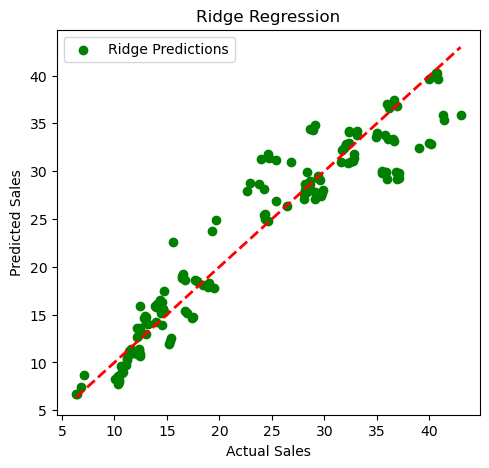

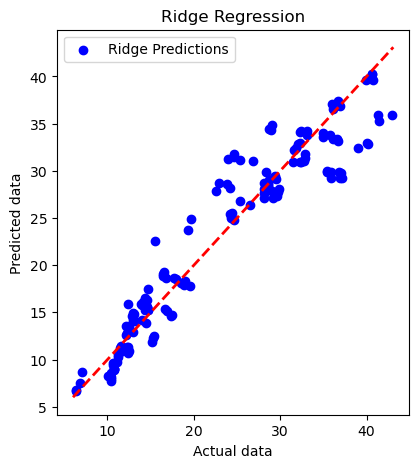

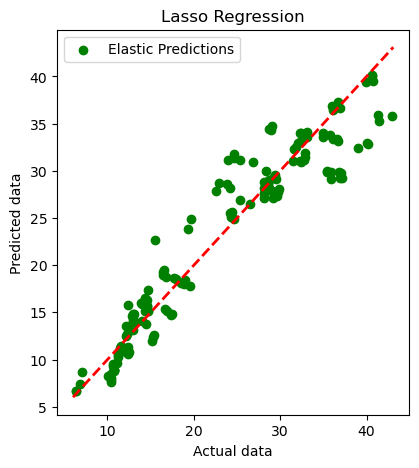

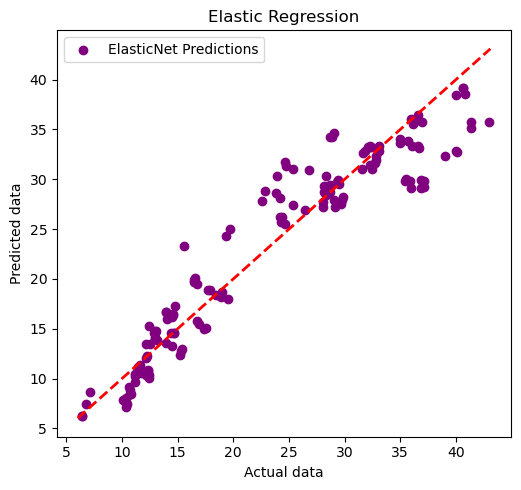

In [124]:
#plot the actual vs predicted values for both models
plt.figure(figsize=(10, 5))

#Ridge Regression Plot 
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
plt.title("Ridge Regression")
plt.legend()

plt.figure(figsize=(10,5))

#Lasso Regression Plot 
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green', label='Elastic Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
plt.title("Lasso Regression")
plt.legend()

plt.figure(figsize=(10,5))

#ElasticNet Regression Plot 
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_elasticnet, color='purple', label='ElasticNet Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
plt.title("Elastic Regression")
plt.legend()

plt.tight_layout()
plt.show()

